<a href="https://colab.research.google.com/github/YunilaPutmasari/Machine_Learning-2024/blob/main/ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tugas 1: Multiple Linear Regression
### **1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal). ***


jawab :
- Variabel target (y): charges (biaya medis personal).
- Variabel bebas (X): age, sex, bmi, children, smoker, region.

In [1]:
# Langkah 1: Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('/content/drive/MyDrive/Mechine Learning/insurance.csv')



- pandas & numpy: Untuk manipulasi data dan komputasi numerik.
- train_test_split: Membagi dataset menjadi data latih dan uji.
- StandardScaler: Menstandarisasi fitur dataset (menjadikan rata-rata 0 dan deviasi standar 1).
- LinearRegression: Membuat model regresi linear untuk prediksi.
- mean_squared_error, r2_score: Metrik untuk mengevaluasi kinerja model.

kemudian membaca file CSV dari lokasi yang diberikan. Dalam hal ini, dataset insurance.csv diambil dari Google Drive pada jalur yang diberikan.

In [2]:
# Memisahkan variabel target dan variabel bebas
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])


X = data[['age', 'bmi', 'smoker']]
y = data['charges']



# Melakukan One-Hot Encoding pada variabel kategorikal
X_encoded = pd.get_dummies(X, drop_first=True)  # Menghapus satu kategori untuk menghindari dummy variable trap

# Menampilkan hasil encoding
print(data.head())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


Berikut adalah penjelasan singkat dari kode tersebut:

1. **Label Encoding**: Mengonversi variabel kategori (`sex`, `smoker`, `region`) menjadi format numerik menggunakan `LabelEncoder`.

2. **Memisahkan Data**:
   - `X` berisi fitur (`age`, `bmi`, `smoker`).
   - `y` berisi target yang ingin diprediksi (`charges`).

3. **One-Hot Encoding**: Mengubah variabel kategorikal dalam `X` menjadi format one-hot dengan `pd.get_dummies`, menghilangkan satu kolom untuk menghindari multikolinearitas (dummy variable trap).

4. **Menampilkan Hasil**: `print(data.head())` menampilkan lima baris pertama dari DataFrame `data` untuk memeriksa hasil encoding.

### **2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.**


In [3]:
# Pembagian dataset menjadi data latih (70%) dan data uji (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Mengubah y_train dan y_test menjadi dua dimensi
y_train = y_train.values.reshape(-1, 1)  # Jika y_train adalah array NumPy
y_test = y_test.values.reshape(-1, 1)    # Jika y_test adalah array NumPy

# Tampilkan data latih dan data uji
print("Data Latih (X_train):", X_train.shape)
print("\nTarget Latih (y_train):", y_train.shape)
print("\nData Uji (X_test):", X_test.shape)
print("\nTarget Uji (y_test):", y_test.shape)


Data Latih (X_train): (936, 3)

Target Latih (y_train): (936, 1)

Data Uji (X_test): (402, 3)

Target Uji (y_test): (402, 1)


1. train_test_split() membagi dataset menjadi dua bagian:
- Data latih (X_train, y_train): Digunakan untuk melatih model (70% dari data).
- Data uji (X_test, y_test): Digunakan untuk menguji kinerja model setelah pelatihan (30% dari data).

2. test_size=0.3 berarti 30% data digunakan untuk pengujian, sementara 70% sisanya untuk pelatihan.
3. random_state=42 memastikan bahwa pembagian data bersifat deterministik, sehingga setiap kali kode dijalankan, pembagiannya tetap sama.


### **3. Lakukan feature scaling jika diperlukan.**


In [4]:
# 5. Feature scaling (standardisasi)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 - membuat instance dari StandardScaler, yang akan digunakan untuk menstandarisasi fitur (kolom) pada data Anda.
 - fit_transform(X_train): Metode ini melakukan dua hal:
- Fit: Menghitung rata-rata dan deviasi standar untuk setiap fitur dalam data latih (X_train).
- Transform: Menggunakan nilai rata-rata dan deviasi standar yang dihitung untuk menstandarisasi data latih.



### **4. Buat model multiple linear regression menggunakan Scikit-Learn.**


In [5]:
model = LinearRegression()

- LinearRegression(): Ini adalah kelas dari pustaka sklearn.linear_model yang digunakan untuk membuat model regresi linier.
- model: Variabel ini sekarang berisi instance dari model regresi linier, yang dapat digunakan untuk melatih model dengan data latih dan membuat prediksi.

### **5. Latih model pada data latih dan lakukan prediksi pada data uji.**


In [6]:
model.fit(X_train_scaled, y_train)

LinearRegression()

fit(X_train_scaled, y_train): Metode ini akan mempelajari pola dari data latih dan menentukan koefisien regresi untuk setiap fitur.

In [7]:
# 8. Melakukan prediksi pada data uji
y_pred = model.predict(X_test_scaled)



predict(X_test_scaled): Metode ini akan menghasilkan prediksi nilai target (dalam hal ini, charges) berdasarkan fitur yang telah distandarisasi di data uji.

### **6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.**

In [8]:
# 9. Evaluasi model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [9]:
# 10. Tampilkan hasil evaluasi
print(f"R-squared: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

R-squared: 0.7655078324224212
Mean Squared Error (MSE): 34382251.77765592
Mean Absolute Error (MAE): 4203.579982683991



1. **Metrik Evaluasi**:
   - **R-squared (R²)**:
     - Mengukur proporsi varians dalam variabel dependen yang dapat diprediksi dari variabel independen. Nilai R² berkisar antara 0 hingga 1, di mana nilai yang lebih tinggi menunjukkan model yang lebih baik.
  
   - **Mean Squared Error (MSE)**:
     - Mengukur rata-rata kuadrat kesalahan antara nilai yang diprediksi oleh model dan nilai sebenarnya. MSE adalah metrik yang sensitif terhadap outlier.

   - **Mean Absolute Error (MAE)**:
     - Mengukur rata-rata kesalahan absolut antara nilai yang diprediksi oleh model dan nilai sebenarnya. MAE memberikan gambaran yang lebih baik tentang kesalahan yang dapat diterima.



### **catatan tambahan :**
### **Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.**

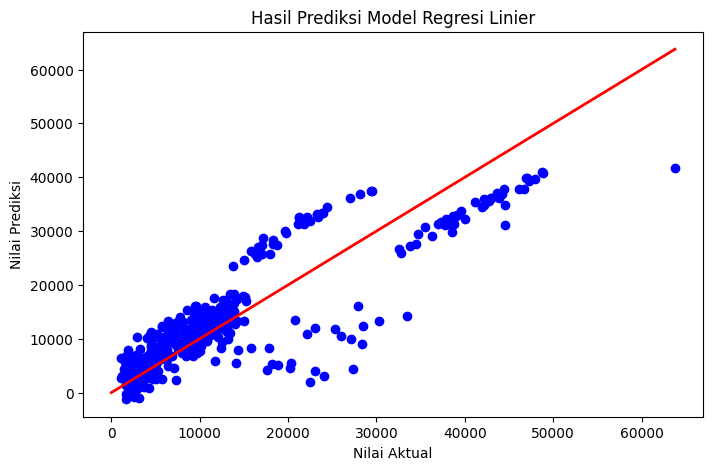

In [10]:
import numpy as np
import matplotlib.pyplot as plt


# Ambil nilai maksimum dari y_test dan y_pred
max_y_test = np.max(y_test)  # Pastikan ini adalah nilai tunggal
max_y_pred = np.max(y_pred)  # Pastikan ini adalah nilai tunggal

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Hasil Prediksi Model Regresi Linier')

# Menggunakan max_y_test untuk garis y=x
plt.plot([0, max(max_y_test, max_y_pred)], [0, max(max_y_test, max_y_pred)], color='red', linewidth=2)  # Garis y=x
plt.show()


Berikut adalah penjelasan singkat tentang kode yang Anda berikan:

1. **Import Library**: Kode dimulai dengan mengimpor dua library penting:
   - `numpy` untuk operasi numerik, terutama untuk menangani array.
   - `matplotlib.pyplot` untuk visualisasi data.

2. **Mendapatkan Nilai Maksimum**:
   - `max_y_test = np.max(y_test)`: Mengambil nilai maksimum dari array `y_test`, yang berisi nilai aktual (target).
   - `max_y_pred = np.max(y_pred)`: Mengambil nilai maksimum dari array `y_pred`, yang berisi nilai prediksi yang dihasilkan oleh model.

3. **Membuat Grafik**:
   - `plt.figure(figsize=(8, 5))`: Mengatur ukuran figure (grafik) menjadi 8 inci x 5 inci.
   - `plt.scatter(y_test, y_pred, color='blue')`: Membuat plot sebar (scatter plot) yang menunjukkan hubungan antara nilai aktual (`y_test`) dan nilai prediksi (`y_pred`) dengan titik berwarna biru.

4. **Menambahkan Label dan Judul**:
   - `plt.xlabel('Nilai Aktual')`: Menambahkan label sumbu x untuk nilai aktual.
   - `plt.ylabel('Nilai Prediksi')`: Menambahkan label sumbu y untuk nilai prediksi.
   - `plt.title('Hasil Prediksi Model Regresi Linier')`: Menambahkan judul pada grafik.

5. **Menambahkan Garis Referensi**:
   - `plt.plot(...)`: Menggambar garis merah yang menunjukkan \(y = x\), yang merepresentasikan kesempurnaan prediksi (nilai prediksi sama dengan nilai aktual). Garis ini dibentuk dari titik (0, 0) hingga titik maksimum dari `y_test` dan `y_pred`.

6. **Menampilkan Grafik**:
   - `plt.show()`: Menampilkan grafik yang telah dibuat.

### Ringkasan
Secara keseluruhan, kode ini digunakan untuk memvisualisasikan seberapa baik model regresi linier dalam memprediksi nilai dengan membandingkan nilai aktual dan nilai prediksi dalam bentuk scatter plot, serta menambahkan garis referensi untuk menilai akurasi model.